<a href="https://colab.research.google.com/github/cherlhee/AI/blob/master/ai_welding_keras_2nd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬을 이용하여 학습, 검증, 테스트 데이터 결과 확인하기

## kiseung, welding modeling(분류)

In [39]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import copy
import pandas as pd

import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras import backend as K
from keras import metrics
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

In [40]:
# to clone data from github;
!git clone https://github.com/cherlhee/AI.git

fatal: destination path 'AI' already exists and is not an empty directory.


In [41]:
df = pd.read_csv('./AI/welding-data-dnn.csv')
df

,label,zig,vtg,crt,gas
0,1,2,20,195.3,27.7
1,1,2,20,195.3,27.7
2,1,2,20,195.3,27.7
3,1,2,20,195.3,27.7
4,1,2,21,183.6,25.2
...,...,...,...,...,...
202,0,1,14,192.3,28.4
203,0,1,14,192.3,28.4
204,0,1,14,179.3,28.3
205,0,1,14,181.6,27.2


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   207 non-null    int64  
 1   zig     207 non-null    int64  
 2   vtg     207 non-null    int64  
 3   crt     207 non-null    float64
 4   gas     207 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 8.2 KB


In [43]:
df.columns

Index(['label', 'zig', 'vtg', 'crt', 'gas'], dtype='object')

In [44]:
x = df.drop(['label'], axis=1)
x



,zig,vtg,crt,gas
0,2,20,195.3,27.7
1,2,20,195.3,27.7
2,2,20,195.3,27.7
3,2,20,195.3,27.7
4,2,21,183.6,25.2
...,...,...,...,...
202,1,14,192.3,28.4
203,1,14,192.3,28.4
204,1,14,179.3,28.3
205,1,14,181.6,27.2


In [45]:
# t = df.iloc[:,-1]
# t

t = df.loc[:,'label']
t

0      1
1      1
2      1
3      1
4      1
      ..
202    0
203    0
204    0
205    0
206    0
Name: label, Length: 207, dtype: int64

In [46]:
# # xy = np.loadtxt('./data_laser_2.csv', delimiter=',', dtype=np.float32)

# # 가장 마지막 column이 분류, 나머지는 Input 변수
# x_data = xy[:, 0:-1]
# x_org = copy.deepcopy(x_data)
# print('x;', x_data)


# y_data = xy[:, [-1]]

# print('y;', y_data)

In [47]:
# to make normal distribution of xdata;
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
print('x;', x)




x; [[ 7.61677538e-01  4.08986267e-01  1.31519297e+00  2.81636287e+00]
 [ 7.61677538e-01  4.08986267e-01  1.31519297e+00  2.81636287e+00]
 [ 7.61677538e-01  4.08986267e-01  1.31519297e+00  2.81636287e+00]
 [ 7.61677538e-01  4.08986267e-01  1.31519297e+00  2.81636287e+00]
 [ 7.61677538e-01  1.06526656e+00 -3.89433947e-01  1.51365659e+00]
 [ 7.61677538e-01  1.06526656e+00 -2.87447721e-01  1.14889883e+00]
 [ 7.61677538e-01  1.06526656e+00 -7.24531547e-01  7.84141075e-01]
 [ 7.61677538e-01  1.06526656e+00 -5.35128555e-01  5.23599819e-01]
 [ 7.61677538e-01  1.06526656e+00 -5.35128555e-01  3.15166814e-01]
 [ 7.61677538e-01  1.06526656e+00 -1.85461495e-01  1.58842060e-01]
 [ 7.61677538e-01  1.06526656e+00 -5.35128555e-01  5.46255580e-02]
 [ 7.61677538e-01  1.06526656e+00 -1.41753112e-01 -4.95909444e-02]
 [ 7.61677538e-01  1.06526656e+00 -7.68239929e-01 -1.53807447e-01]
 [ 7.61677538e-01  1.06526656e+00 -5.35128555e-01 -2.05915698e-01]
 [ 7.61677538e-01  1.06526656e+00  3.94149666e-03 -2.580239

In [48]:
# split data: Training data를 70%
x_train, x_test, t_train, t_test = train_test_split(x, t,
				       train_size=0.70, random_state=42)

# split data: Validation과 Test data를 50:50 으로
# x_val, x_test, t_val, t_test = train_test_split(x_test, t_test,
# 				       train_size=0.50, random_state=42)

In [49]:

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=4))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))


#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, t_train, epochs=20, batch_size=10)
# history = model.fit(x_train, t_train, epochs=200, batch_size=10, validation_data=(x_val, t_val))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


15/15 [==============================] - 2s 3ms/step - loss: 0.6341 - accuracy: 0.7569
Epoch 2/20
15/15 [==============================] - 0s 3ms/step - loss: 0.4900 - accuracy: 0.8958
Epoch 3/20
15/15 [==============================] - 0s 3ms/step - loss: 0.3922 - accuracy: 0.9097
Epoch 4/20
15/15 [==============================] - 0s 3ms/step - loss: 0.3160 - accuracy: 0.9306
Epoch 5/20
15/15 [==============================] - 0s 3ms/step - loss: 0.2547 - accuracy: 0.9375
Epoch 6/20
15/15 [==============================] - 0s 3ms/step - loss: 0.2128 - accuracy: 0.9375
Epoch 7/20
15/15 [==============================] - 0s 3ms/step - loss: 0.1894 - accuracy: 0.9375
Epoch 8/20
15/15 [==============================] - 0s 4ms/step - loss: 0.1748 - accuracy: 0.9375
Epoch 9/20
15/15 [==============================] - 0s 3ms/step - loss: 0.1630 - accuracy: 0.9444
Epoch 10/20
15/15 [==============================] - 0s 3ms/step - loss: 0.1575 - accuracy: 0.9583
Epoch 11/20
15/15 [===========

In [50]:
print('df.shape;', df.shape)

df2 = df
df2.shape

df.shape; (207, 5)


(207, 5)

In [51]:
df2.columns = ['upper','lower', 'speed','focus','location']
# Index(['#1. Strength of upper sheet', '#2. Strength of lower sheet',
#        '#3. Welding speed', '#4. Focal position',
#        '#6. Fracture location (0: BM 1: HAZ 2: FZ)'],
#       dtype='object')
df2.columns
# for i in range(len(t)):
#     print(x[i,:], t[i,:], model.predict(x)[i])

Index(['upper', 'lower', 'speed', 'focus', 'location'], dtype='object')

In [52]:
# to predict
y_test = model.predict(x_test)
print(y_test[:10])
print(t_test[:10])



2/2 [==============================] - 0s 7ms/step
[[9.6940583e-01 3.0594151e-02]
 [9.7975112e-04 9.9902022e-01]
 [9.9710780e-01 2.8922341e-03]
 [9.9990654e-01 9.3439332e-05]
 [9.6537173e-01 3.4628291e-02]
 [1.3564934e-03 9.9864346e-01]
 [9.9967492e-01 3.2511272e-04]
 [9.9991262e-01 8.7378176e-05]
 [9.1383059e-04 9.9908614e-01]
 [9.5506382e-01 4.4936258e-02]]
161    0
15     1
73     0
96     0
166    0
9      1
100    0
135    0
18     1
148    0
Name: label, dtype: int64


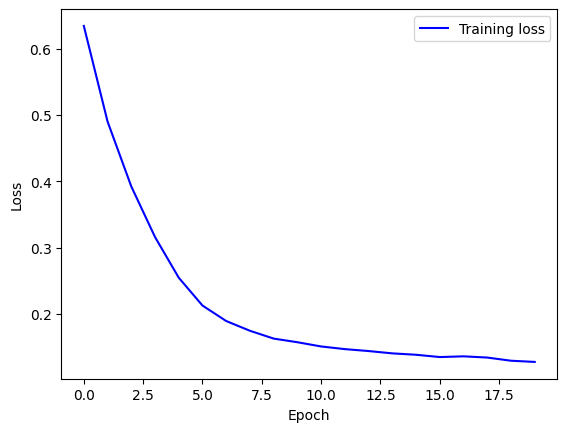

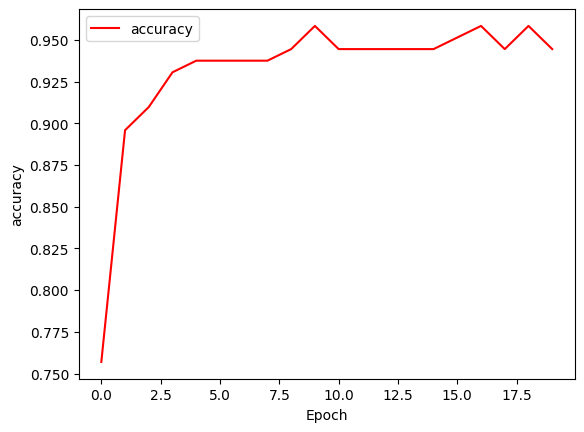

In [53]:
loss = history.history['loss']
acc = history.history['accuracy']


plt.plot(loss, 'b', label='Training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


plt.plot(acc, 'r', label='accuracy')

# plt.plot(history.history['val_loss'], 'b', label='Validation loss')
# plt.title('Training and validation loss')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [54]:
loss, accuracy = model.evaluate(x_test, t_test)
print('accuracy; ', accuracy)
print('loss; ', loss)

2/2 [==============================] - 0s 8ms/step - loss: 0.0946 - accuracy: 0.9365
accuracy;  0.9365079402923584
loss;  0.09460096061229706


In [55]:
# to save model and reuse it;

model.save('./mymodel.hdf5')

In [56]:
model2 = load_model('./mymodel.hdf5')

In [57]:
# to predict
y_test = model2.predict(x_test)
print(y_test[:10])
print(t_test[:10])

2/2 [==============================] - 0s 9ms/step
[[9.6940583e-01 3.0594151e-02]
 [9.7975112e-04 9.9902022e-01]
 [9.9710780e-01 2.8922341e-03]
 [9.9990654e-01 9.3439332e-05]
 [9.6537173e-01 3.4628291e-02]
 [1.3564934e-03 9.9864346e-01]
 [9.9967492e-01 3.2511272e-04]
 [9.9991262e-01 8.7378176e-05]
 [9.1383059e-04 9.9908614e-01]
 [9.5506382e-01 4.4936258e-02]]
161    0
15     1
73     0
96     0
166    0
9      1
100    0
135    0
18     1
148    0
Name: label, dtype: int64
